In [7]:
from rich import print as rprint

import arff


import numpy as np
import pandas as pd


import matplotlib.pyplot as plt


from IPython.core.interactiveshell import InteractiveShell

import main


InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.precision", 2)


#### Explorative Datenanalyse and Feature engineering

-   Der zweite Vertrag hat sechs Verträge mehr als der erste Vertrag.
-   Viele Nullen für `ClaimAmount`


In [9]:
df = pd.read_csv("ins_claims.csv", index_col=0)

rprint(df.info())

df.describe(include=["float64", "object"])

rprint(sum(df["ClaimAmount"] > 0.0) / df.shape[0])
rprint(sum(df["ClaimNb"] > 0.0) / df.shape[0])


<class 'pandas.core.frame.DataFrame'>
Index: 678013 entries, 0 to 678012
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   IDpol        678013 non-null  float64
 1   ClaimAmount  678013 non-null  float64
 2   ClaimNb      678013 non-null  float64
 3   Exposure     678013 non-null  float64
 4   Area         678013 non-null  object 
 5   VehPower     678013 non-null  float64
 6   VehAge       678013 non-null  float64
 7   DrivAge      678013 non-null  float64
 8   BonusMalus   678013 non-null  float64
 9   VehBrand     678013 non-null  object 
 10  VehGas       678013 non-null  object 
 11  Density      678013 non-null  float64
 12  Region       678013 non-null  object 
dtypes: float64(9), object(4)
memory usage: 72.4+ MB


None

,IDpol,ClaimAmount,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
count,6.78e+05,6.78e+05,678013.00,6.78e+05,678013,678013.00,678013.00,678013.00,678013.00,678013,678013,678013.00,678013
unique,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,11,2,NaN,22
top,NaN,NaN,NaN,NaN,'C',NaN,NaN,NaN,NaN,'B12',Regular,NaN,'R24'
freq,NaN,NaN,NaN,NaN,191880,NaN,NaN,NaN,NaN,166024,345877,NaN,160601
mean,2.62e+06,8.84e+01,0.05,5.29e-01,NaN,6.45,7.04,45.50,59.76,NaN,NaN,5.98,NaN
std,1.64e+06,5.82e+03,0.24,3.64e-01,NaN,2.05,5.67,14.14,15.64,NaN,NaN,1.87,NaN
min,1.00e+00,0.00e+00,0.00,2.73e-03,NaN,4.00,0.00,18.00,50.00,NaN,NaN,0.00,NaN
25%,1.16e+06,0.00e+00,0.00,1.80e-01,NaN,5.00,2.00,34.00,50.00,NaN,NaN,4.52,NaN
50%,2.27e+06,0.00e+00,0.00,4.90e-01,NaN,6.00,6.00,44.00,50.00,NaN,NaN,5.97,NaN
75%,4.05e+06,0.00e+00,0.00,9.90e-01,NaN,7.00,11.00,55.00,64.00,NaN,NaN,7.41,NaN


0.0367898550617761

0.05023502499214617

<Axes: xlabel='IDpol', ylabel='IDpol'>

<Axes: xlabel='IDpol', ylabel='ClaimAmount'>

<Axes: xlabel='IDpol', ylabel='ClaimNb'>

<Axes: xlabel='IDpol', ylabel='Exposure'>

<Axes: xlabel='IDpol', ylabel='Area'>

<Axes: xlabel='IDpol', ylabel='VehPower'>

<Axes: xlabel='IDpol', ylabel='VehAge'>

<Axes: xlabel='IDpol', ylabel='DrivAge'>

<Axes: xlabel='IDpol', ylabel='BonusMalus'>

<Axes: xlabel='IDpol', ylabel='VehBrand'>

<Axes: xlabel='IDpol', ylabel='VehGas'>

<Axes: xlabel='IDpol', ylabel='Density'>

<Axes: xlabel='IDpol', ylabel='Region'>

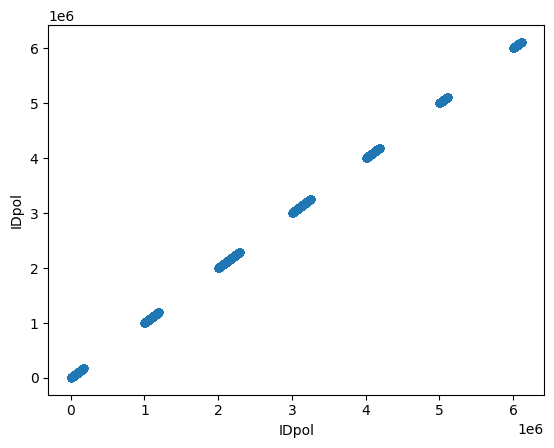

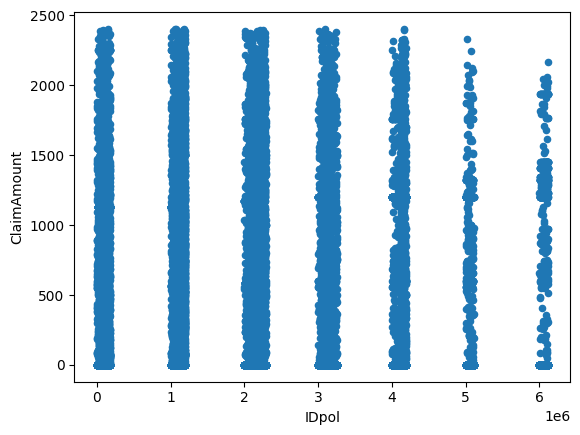

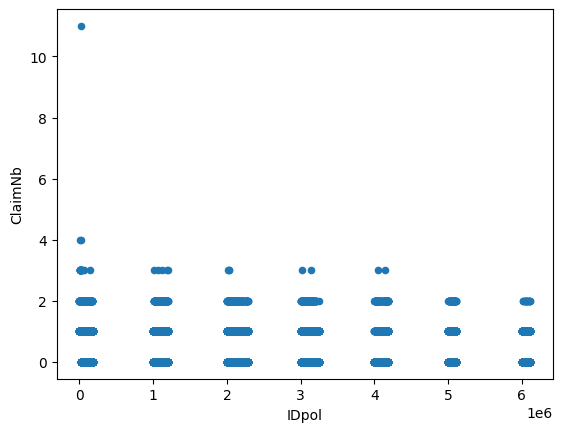

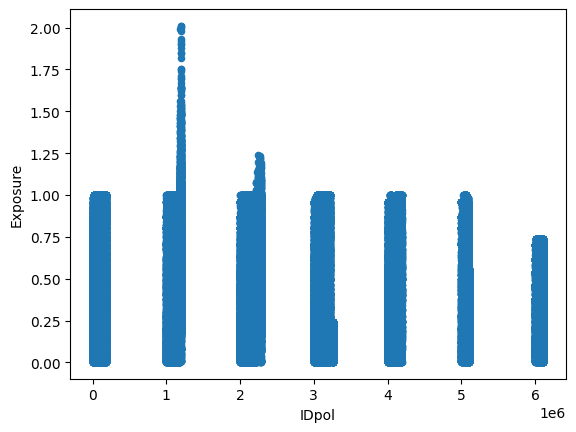

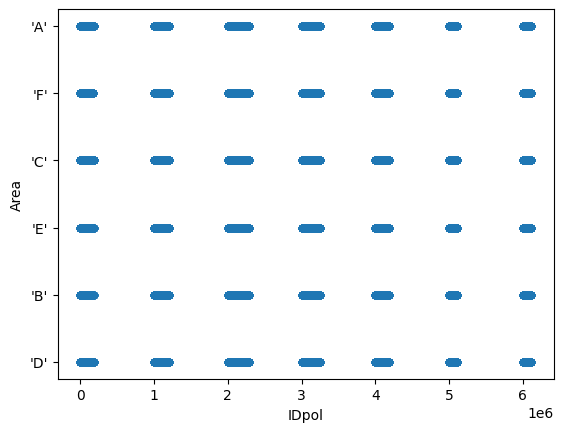

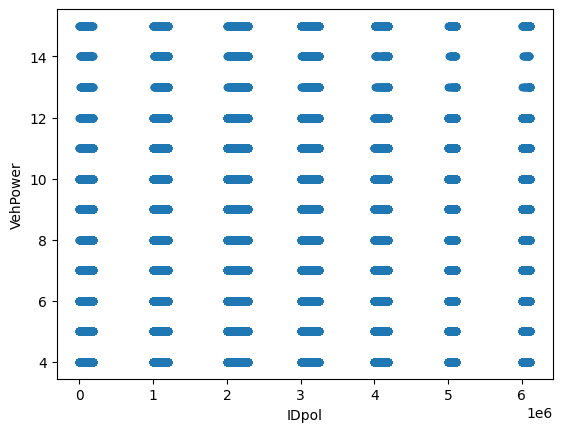

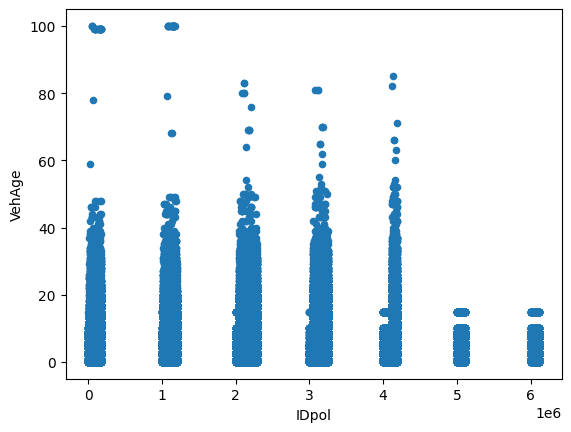

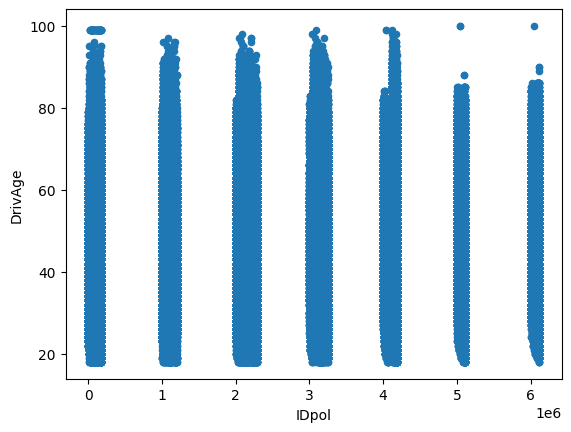

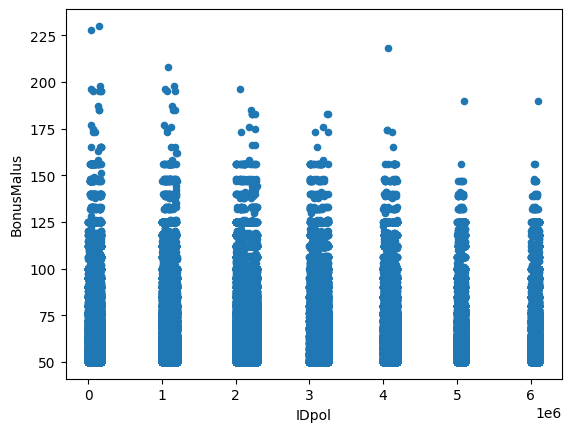

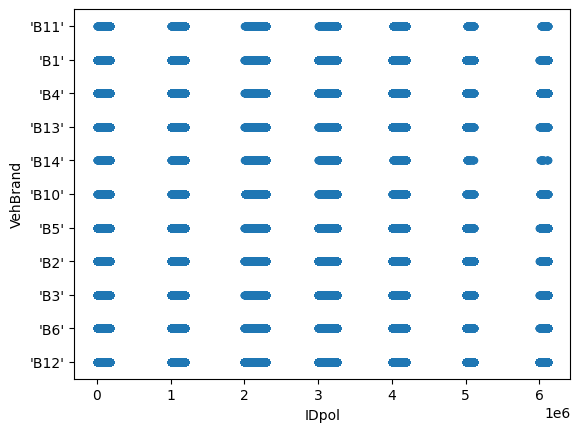

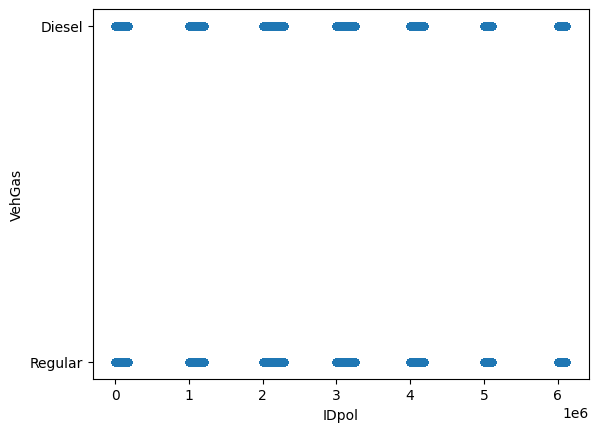

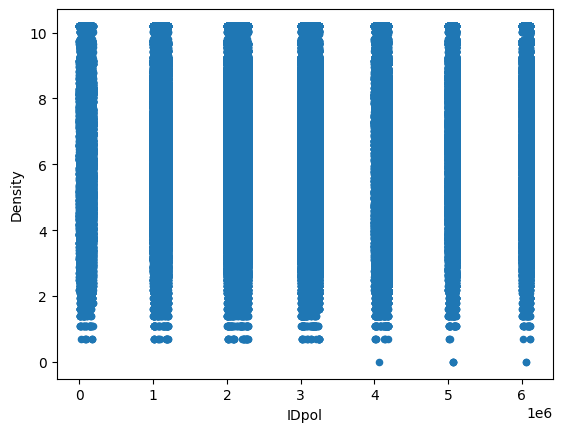

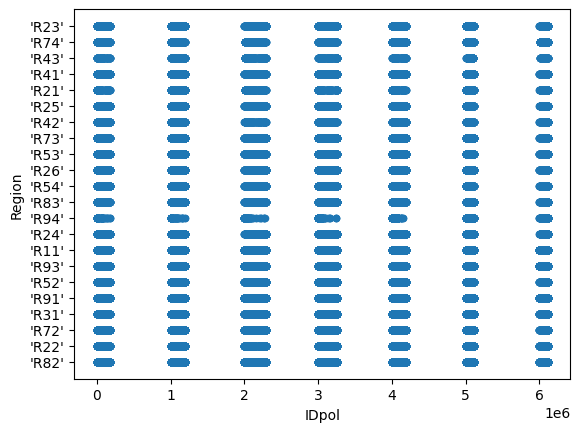

In [3]:
up_lim = df["ClaimAmount"].quantile(0.995)
df = df[df["ClaimAmount"] < up_lim]

for key_ in df.columns:
    df.plot.scatter(x="IDpol", y=key_)


In [4]:
df_sev = df[df["ClaimAmount"] > 0]
df_sev.corr(numeric_only=True)


,IDpol,ClaimAmount,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
IDpol,1.00e+00,8.42e-02,-2.53e-03,-0.10,5.92e-02,-9.80e-02,0.06,-0.03,5.27e-02
ClaimAmount,8.42e-02,1.00e+00,2.42e-01,-0.04,-3.10e-03,-9.62e-03,0.04,0.09,3.57e-03
ClaimNb,-2.53e-03,2.42e-01,1.00e+00,0.02,-3.43e-03,-1.32e-02,-0.02,0.07,3.35e-02
Exposure,-9.50e-02,-3.91e-02,1.99e-02,1.00,-1.74e-02,1.06e-02,0.19,-0.14,-8.05e-02
VehPower,5.92e-02,-3.10e-03,-3.43e-03,-0.02,1.00e+00,-1.82e-02,0.02,-0.07,1.85e-02
VehAge,-9.80e-02,-9.62e-03,-1.32e-02,0.01,-1.82e-02,1.00e+00,-0.08,0.14,-7.13e-02
DrivAge,5.97e-02,3.86e-02,-2.10e-02,0.19,2.08e-02,-7.59e-02,1.00,-0.47,-3.68e-02
BonusMalus,-3.16e-02,8.95e-02,7.26e-02,-0.14,-6.74e-02,1.40e-01,-0.47,1.00,9.45e-02
Density,5.27e-02,3.57e-03,3.35e-02,-0.08,1.85e-02,-7.13e-02,-0.04,0.09,1.00e+00


## Modellvergleich


In [8]:
df = main.load_csv()
df.head()


,ClaimExp,VehPower,VehAge,DrivAge,BonusMalus,Density
0,0.0,5.0,0.0,55.0,50.0,7.10
1,0.0,5.0,0.0,55.0,50.0,7.10
2,0.0,6.0,2.0,52.0,50.0,3.99
3,0.0,7.0,0.0,46.0,50.0,4.33
4,0.0,7.0,0.0,46.0,50.0,4.33


## Modellbuilding
